<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:** Axel Jaramillo, Rafael Juarez Badillo

**Fecha:** 7 marzo 2024

**Expediente** : 730793, 733240
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [Link](https://github.com/RafaJBZ/Tarea_4_RAJuarez_AXCabrera)

# Tarea 4: Clase 11

## Descripción
Terminar los demás numerales faltantes del ejercicio, dataset boston housing.

Código de solución estudiante 1

In [2]:
# Código de solución estudiante 1
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()


2024-03-07 16:15:34.641095: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-07 16:15:37.571332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 16:15:37.571604: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 16:15:38.232488: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 16:15:40.027361: I tensorflow/core/platform/cpu_feature_guar

ModuleNotFoundError: No module named 'seaborn'

In [85]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((404, 13), (404,), (102, 13), (102,))

In [86]:
# Obviar la columna -2 por que considera una variable de poco interés
np.delete(train_data, -2, axis=1)[0:3,-4:]
train_data = np.delete(train_data, -2, axis=1)
test_data = np.delete(test_data, -2, axis=1)
np.hstack([train_labels, test_labels]).shape

(506,)

In [87]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,34.41,14.4


In [56]:
X.shape, y.shape

((506, 12), (506, 1))

## Boston Dataset
A data set containing housing values in 506 suburbs of Boston.

crim: per capita crime rate by town.

zn: proportion of residential land zoned for lots over 25,000 sq.ft.

indus: proportion of non-retail business acres per town.

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: nitrogen oxides concentration (parts per 10 million).

rm: average number of rooms per dwelling.

age: proportion of owner-occupied units built prior to 1940.

dis: weighted mean of distances to five Boston employment centres.

rad: index of accessibility to radial highways.

tax: full-value property-tax rate per $10,000.

ptratio: pupil-teacher ratio by town.

lstat: lower status of the population (percent).

medv: median value of owner-occupied homes in $1000s.

<ipython-input-88-ddda3f7b3fdc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


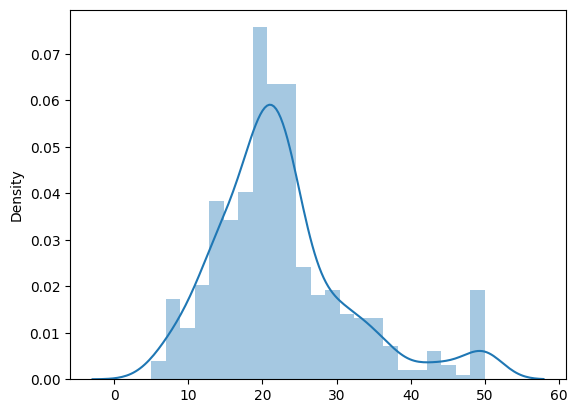

In [88]:
sns.distplot(y)
plt.show()

<Axes: >

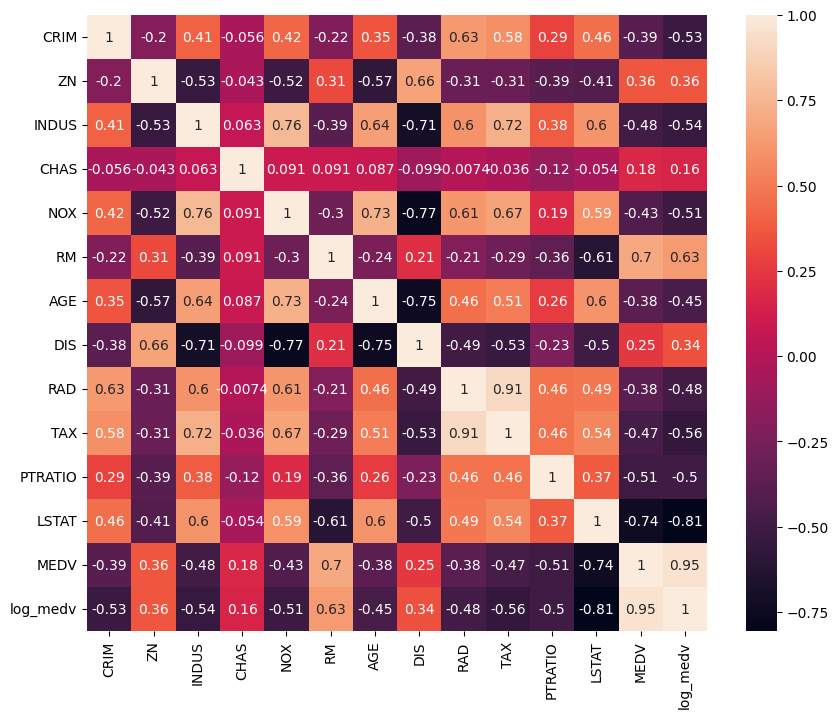

In [64]:
corr = data.corr()
fig, ax = plt.subplots(1,1, figsize=(10, 8))
sns.heatmap(corr, annot=True, ax=ax)

In [76]:
# Elegir variables más significativas
data.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,log_medv
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2,2.721295


In [80]:
features = ['ZN', 'CHAS', 'RM', 'DIS']
output = ['MEDV']

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

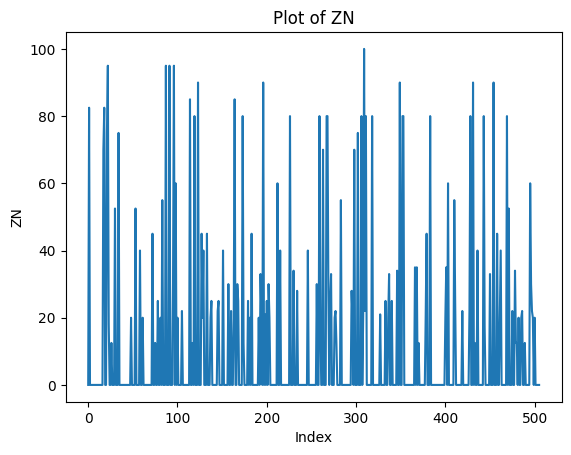

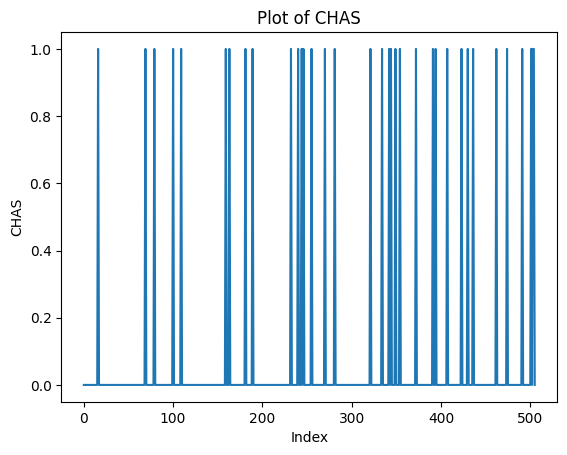

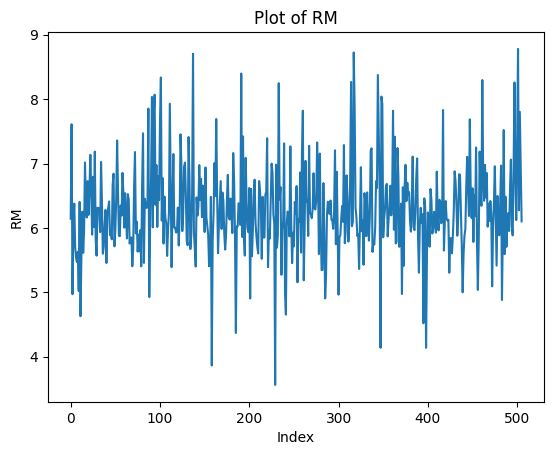

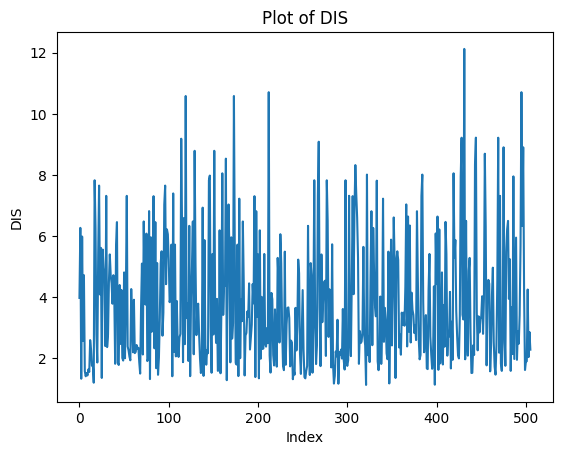

In [83]:
for column in features:
    data[column].plot()
    plt.title(f"Plot of {column}")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.show()

In [93]:
features_cols = ['RM', 'ZN', 'DIS', 'CHAS']
target_col = ['MEDV']


scaler = StandardScaler()
data_standardized = scaler.fit_transform(data[features_cols])


standarized = pd.DataFrame(data_standardized, columns=features_cols)

X_train, X_test, y_train, y_test = train_test_split(standarized, data[target_col], test_size=0.2, random_state=1234)


z_scores = (X_train - X_train.mean()) / X_train.std()
outliers = (z_scores > 3) | (z_scores < -3)
X_train_no_outliers = X_train[~outliers.any(axis=1)]
y_train_no_outliers = y_train[~outliers.any(axis=1)]


In [100]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_no_outliers.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Train the model
fit = model.fit(X_train_no_outliers, y_train_no_outliers, epochs=100, batch_size=32, validation_split=0.2)

# Print model summary
model.summary()

Epoch 1/100
9/9 [==============================] - 2s 35ms/step - loss: 505.4037 - mae: 21.0121 - val_loss: 527.2896 - val_mae: 21.1514
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 455.6645 - mae: 19.8395 - val_loss: 464.4555 - val_mae: 19.6477
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 376.2712 - mae: 17.7799 - val_loss: 365.3759 - val_mae: 17.0078
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 266.5234 - mae: 14.5080 - val_loss: 245.6137 - val_mae: 13.4605
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 154.3346 - mae: 10.4724 - val_loss: 146.0038 - val_mae: 9.8780
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 82.4665 - mae: 7.5034 - val_loss: 93.8804 - val_mae: 7.9016
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 54.6998 - mae: 6.0809 - val_loss: 74.5599 - val_mae: 7.0583
Epoch 8/100
9/9 [==============================] - 0s 6ms/step 

In [102]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

4/4 [==============================] - 0s 5ms/step - loss: 74.8676 - mae: 5.0421
Error cuadrático medio en el conjunto de prueba: 74.86760711669922
Error absoluto medio en el conjunto de prueba: 5.04214334487915


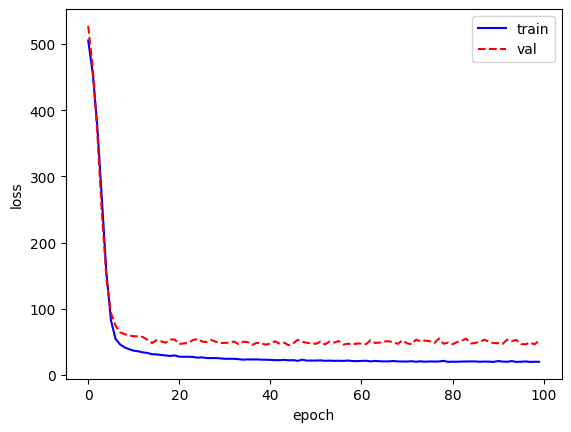

In [101]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(fit.history['loss'], 'b', label='train')
plt.plot(fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

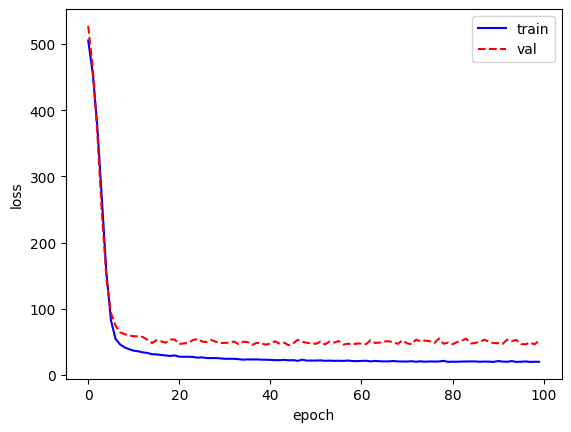

In [103]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(fit.history['loss'], 'b', label='train')
plt.plot(fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [104]:
predicted = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [105]:
predicted.shape, test_data.shape

((102, 1), (102, 12))

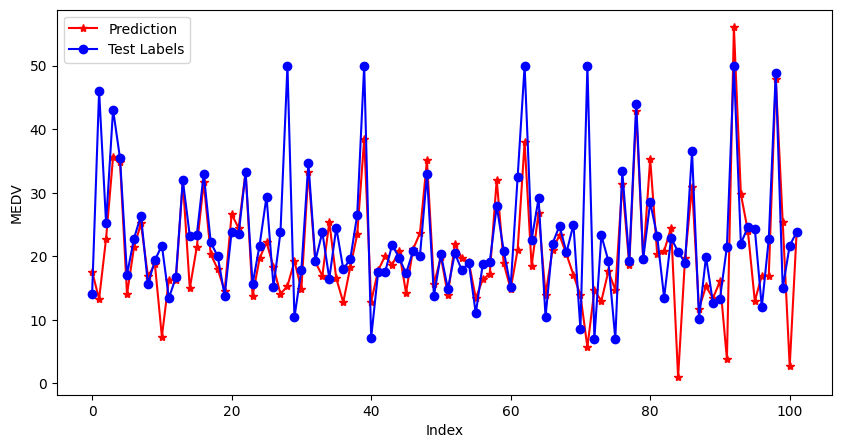

In [107]:
plt.figure(figsize=(10, 5))
plt.plot(predicted, 'r*-', label='Prediction')
plt.plot(y_test.values, 'bo-', label='Test Labels')
plt.xlabel('Index')
plt.ylabel('MEDV')
plt.legend()
plt.show()

**Código de solución estudiante 2 Rafael Juarez**

In [5]:

(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [6]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [7]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7


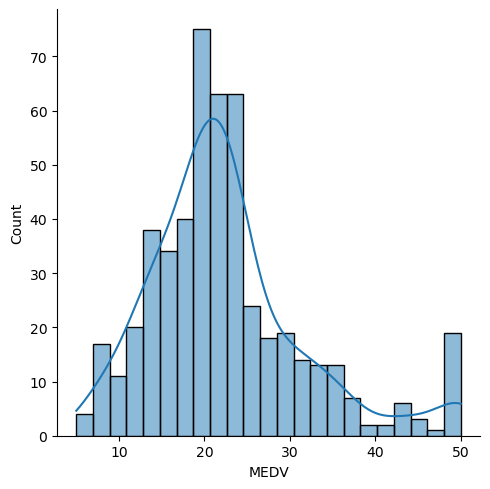

In [8]:
import seaborn as sn
sn.displot(data, x='MEDV', kde=True)

<Axes: >

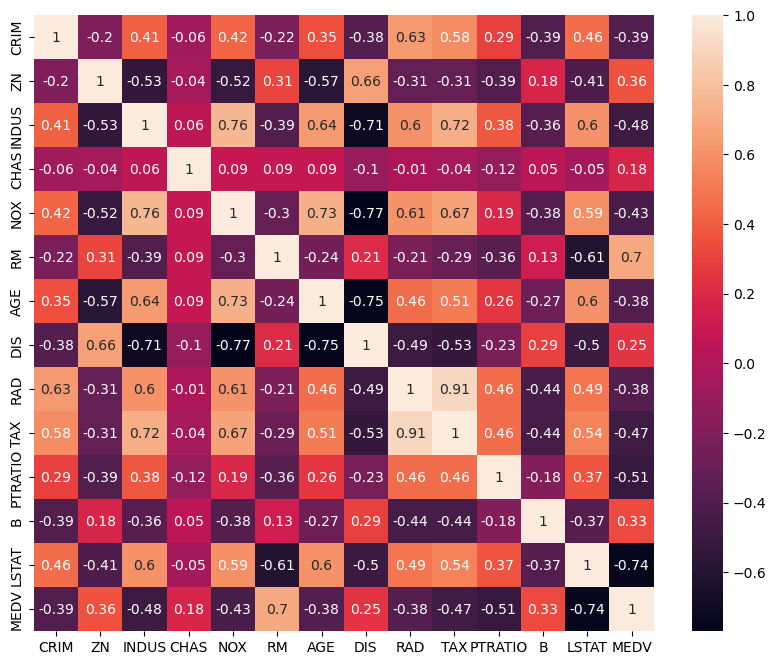

In [9]:
corr = data.corr().round(2)

fig, ax = plt.subplots(1,1, figsize=(10, 8))
sn.heatmap(corr, annot=True, ax=ax)

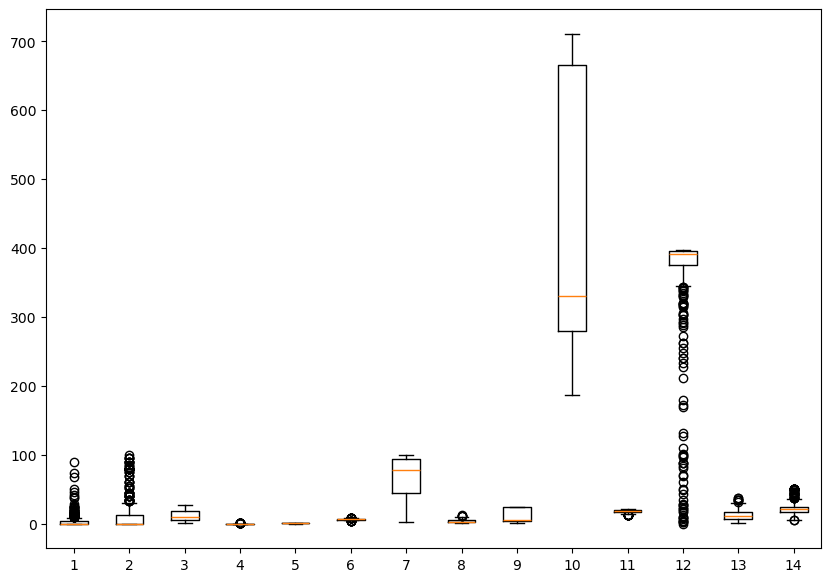

In [10]:
plt.figure(figsize=(10,7))
plt.boxplot(data)
plt.show()

<Axes: >

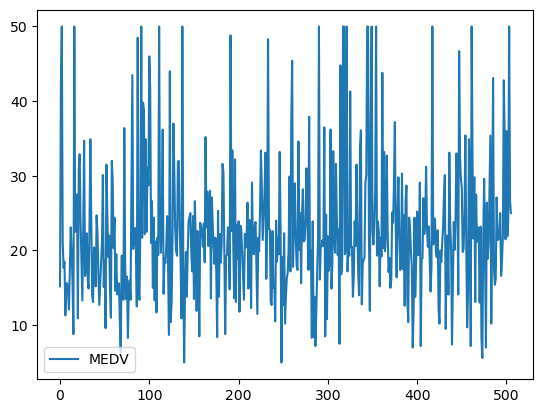

In [11]:
output_col = ['MEDV']
data[output_col].plot()

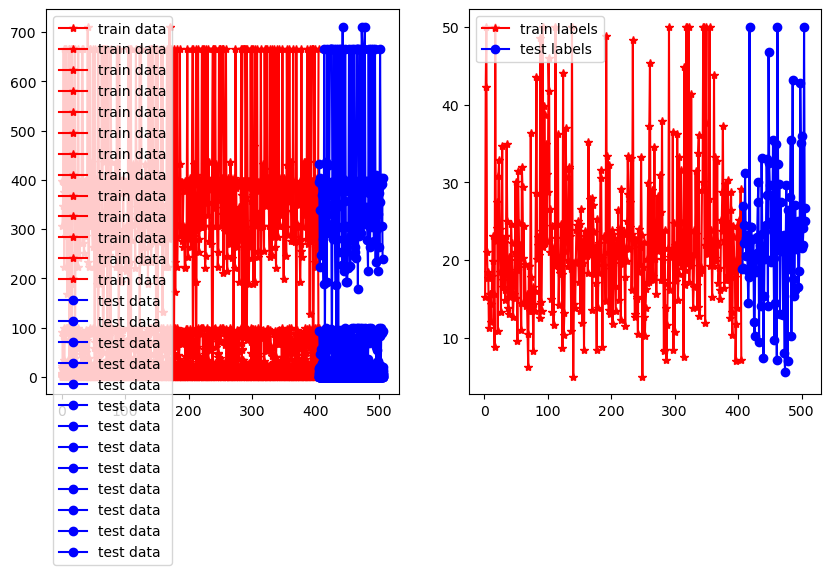

In [12]:
TEST_SIZE = int(0.2 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X.shape[0] + 1)
train_data, test_data = X[:TRAIN_SIZE], X[TRAIN_SIZE:]
train_labels, test_labels = y[:TRAIN_SIZE], y[TRAIN_SIZE:]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t[:TRAIN_SIZE], train_data, 'r*-', label='train data')
ax[0].plot(t[TRAIN_SIZE:], test_data, 'bo-', label='test data')
ax[0].legend()

ax[1].plot(t[:TRAIN_SIZE], train_labels, 'r*-', label='train labels')
ax[1].plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')
plt.legend()

In [13]:
test_data.shape, test_labels.shape

((101, 13), (101, 1))

In [14]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [16]:
tf.random.set_seed(17)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 6113 (23.88 KB)
Trainable params: 6113 (23.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=50, 
    batch_size=32, 
    verbose=0
)

test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Cuadratic mean error:', test_mse_score)
print('Mean absolute error:', test_mae_score)

2024-03-07 16:21:06.833764: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-07 16:21:19.710706: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2de5e46530 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-07 16:21:19.710812: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-03-07 16:21:19.942955: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-07 16:21:23.109521: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1709850085.016700   75750 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 [==============================] - 0s 11ms/step - loss: 29.6429 - mae: 3.3826
Cuadratic mean error: 29.642892837524414
Mean absolute error: 3.3825695514678955


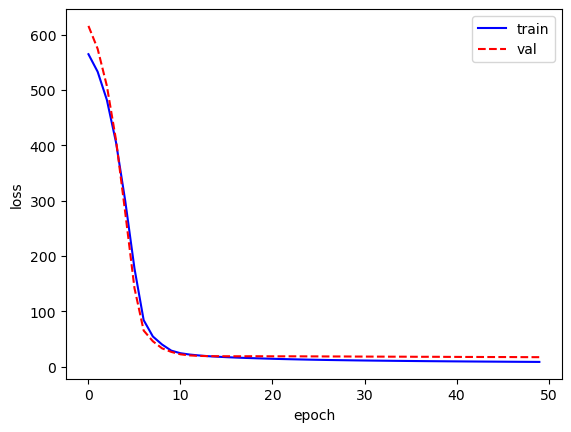

In [19]:
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

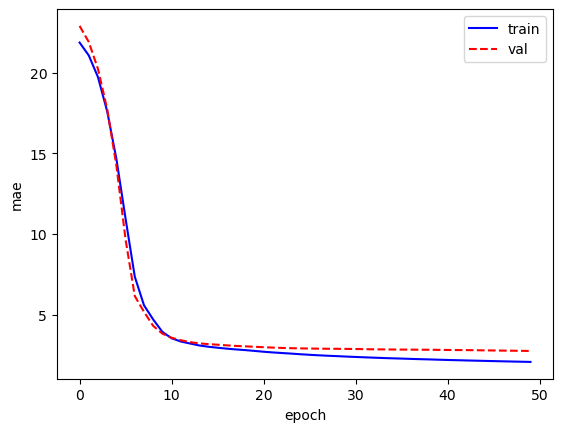

In [18]:
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

In [21]:
predicted = model.predict(test_data)

4/4 [==============================] - 0s 5ms/step


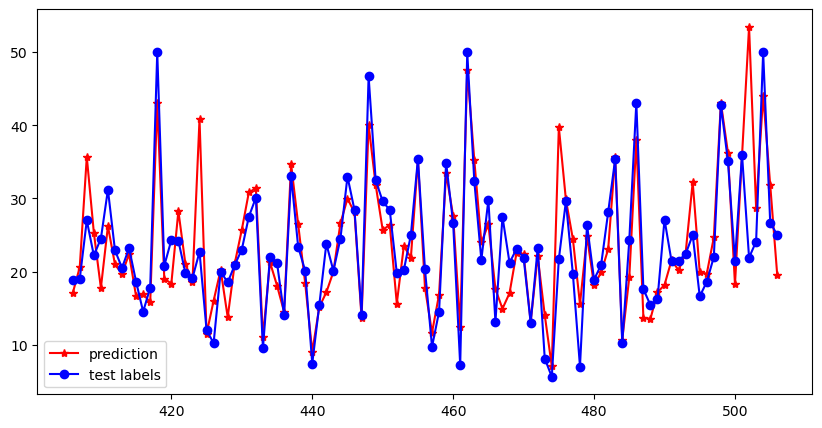

In [22]:
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')

plt.legend()